# NB
In the SVM section I have answered the questions slightly out of ordered and not numbered them as I wanted to approach the classification section iteratively and incrementally increase complexity. 

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn import metrics

# General

## 1)
Gradient descent is a type of optimisation algorithm used during the training phase of the model. It could be used, for example, in linear regression to fit a line of best fit to a set of points. The process involves measuring the gradient of a cost or error function. The gradient measures the rate at which the error function changes under changes in the weightings of the parameters and a cost function measures the accuracy of a model's predictions on the test data. One example a such a function is the Root Mean Squared Error (RMSE). Gradient descent begins with random weightings then the parameters are then shifted in the direction which minimises the cost function. This is repeated in small iterative steps until the the gradient reaches 0 meaning that the cost function has been minimised and a local or global minimum has been found. The most important hyper-parameter in gradient descent is 'learning rate' which determines the parameter 'step size'. Finding the optimum step size is a balancing act, if the step size is too small many iterations will be required which is time consuming and computationally expensive whereas, if the step size is too large, there is a risk that minimum will be overshot. There are a few variations of gradient descent. The first is Batch Gradient Descent. In this variant, all the gradients of the cost function for each parameter are calculated together prior to any adjustments. The process is then repeated. This method converges towards the minimum at a constant rate however it can be computationally slow when the data set is large and miss the global minimum if it reaches a local minimum first. Stochastic Gradient descent (SGD) however selects a single random data point in the training data and calculates the gradient of the cost function for the singular data before adjusting the overall parameters towards the minimum. This process is then repeated. This means that on average the overall gradient will move towards zero, however, it may not directly or consistently. The degree of randomness present in SGD can be helpful in moving past local minima and finding the global minimum beyond them. Finally, there is mini-batch descent which is a combination of the above approaches. Rather than using the whole dataset or a singular piece in one iteration, a subset of the data is randomly selected called a mini-batch. 

## 2)
Linear regression is a type of supervised learning predictive algorithm where the outputs are continuous data. It maps an input variable or set or input variables to an output variable where the relationship between them is linear. The idea is to find a set of weights which correspond to each input such that when they multiplied and the sum is calculated (along with a constant called the bias or intercept term), the error function is as close to 0 as possible. For the error function the RMSE can be used but the MSE can be simpler and also produces the same result (the configuration that minimise a root it will also minimise its square). The inputs and weights with the bias term form an equation of a line which is the line of best fit for the training data. The optimal weights configuration can be calculated in two ways. The first is called the Normal Equation and it uses a mathematical equation to derive the result directly. The second is gradient descent in which the weight are iteratively shifted until they converge on the minimised error function (see above). 

Some of the advantages of simple or vanilla linear regression are that it is straightforward and easy to use with relatively low computational power needed. Because it plots straight lines overfitting / high variance is unlikely to occur. The disadvantages are that it presumes that the relationship between input and output is linear. If this is not the case the predictions will be highly inaccurate. Although it avoid overfitting, it is prone to underfitting. It is also sensitive to outliers, drastic ones can shift the whole gradient of the line dramatically. Finally, unlike polynomial regression, when multiple features are present, liner regression cannot find relationships between features. 

# Coding

## 3)
The dataset was taken from [kaggle](https://www.kaggle.com/datasets/andonians/random-linear-regression). It is a set of randomly generated x and y values, 700 rows long. For the model I had to use Stochastic Gradient Descent (SGD)since I could not find a sklearn function for other types of gradient descent. Since the dataset was intented for calculating linear regeression with the normal equation, I had to add an extra dimension to the x input since SGD takes a 2D array for the x input. This was done in line 10 of the training data cleaning cell.

In [2]:
# Load the data
data = pd.read_csv("/Users/isaaclambert/Desktop/Linear_Regression_Dataset/train.csv")

In [3]:
# Cleaning the training data

x = data["x"]
y = data["y"]

# Convert from pd to arrays
arr_x = x.to_numpy()
arr_y = y.to_numpy()

# add extra dimension to x input
arr_x_extra_d = np.expand_dims(arr_x, axis=1)

# Scale the data
x_scaled = scale(arr_x_extra_d)
y_scaled = scale(arr_y)

print(x_scaled.shape)
print(y_scaled.shape)

(700, 1)
(700,)


In [4]:
# Split the data
train_x, test_x, train_y, test_y = split(x_scaled, y_scaled, test_size=0.2, random_state=21, shuffle=True)

## 3) Linear Regression with SGD

In [5]:
# Set up model
sgd = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

# Train model
model = sgd.fit(train_x, train_y)

# output y predictions for the x test data
y_predicted = model.predict(test_x)

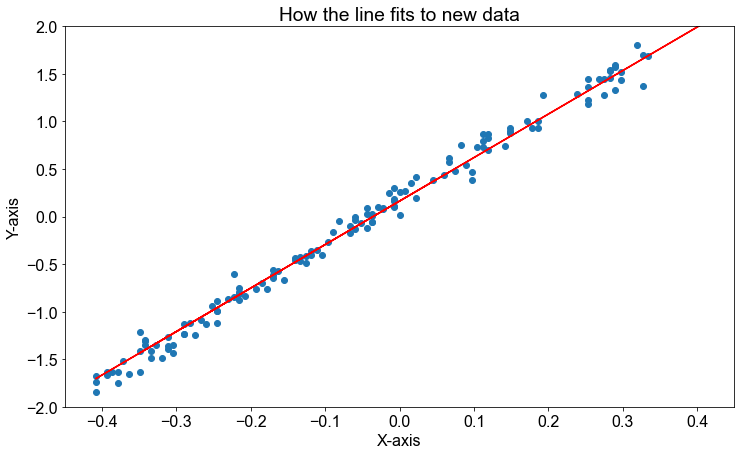

In [6]:
# Plot Results 

plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 16})

# Plot test points
plt.scatter(test_x, test_y )

# Plot line of best fit / predictions 
plt.plot(test_x, y_predicted, 'r')

plt.title('How the line fits to new data')
plt.ylabel("Y-axis")
plt.xlabel("X-axis")
fig = plt.gcf()
fig.set_size_inches(12, 7)
plt.xlim(-0.45,0.45)
plt.ylim(-2, 2)
plt.show()

## 4)
In my Linear regression with SGD model the default value was used for the loss parameter which mean as the Mean Squared Error (MSE) was used for the error function. This can be used in place of the Root Mean Squared Error (RSME) since the theta value that minimises the MSE will also minimise its root, ie the RSME. The MSE was used as the error function for this model as it is a convex function. A convex function has a form such that a line intersecting any two points on the curve will not intersect with the curve other than at those two points. We can conclude from this that in a convex function, there are no local minima so there is only one global minimum. This means that as long as the step sizes are not too large, the model is guaranteed to converge on the global minimum point. A global minimum is the lowest point on a 2 dimensional graph. It is the point where the gradient is 0 and at which a line intersecting the point, parallel to the x axis, would not cross the curve elsewhere. A local minimum also has a gradient of 0 but a line intersecting the minimum parallel to the x axis would cross the curve elsewhere. 

## 5) Batch Linear Regression


In [7]:
# Y altered for Batch Linear Regression
arr_y_xd = np.expand_dims(arr_y, axis=1)
xd_y_scale = scale(arr_y_xd)

In [8]:
print(x_scaled.shape)
print(xd_y_scale.shape)

(700, 1)
(700, 1)


In [9]:
X_b = np.c_[np.ones((700, 1)), x_scaled] # add x0 = 1 to each instance

eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - xd_y_scale)
    theta = theta - eta * gradients

theta

array([[nan],
       [nan]])

I found the incantation behind batch gradient descent confusing and couldn't get it to work despite tyring to replicte what was done in the book. I would like to understand more about whats actually going on with the code.

## 6) Polynomical regression against the same dataset

In [10]:
# import polynomial features function
pol = PolynomialFeatures(degree=2)

# Transform the x input into polynomial features degree 2
pol_features = pol.fit_transform(x_scaled)

# Split the tranformed data
pX_train, pX_test, pY_train, pY_test = split(pol_features, y_scaled, test_size=0.2, random_state=21)


In [11]:
# Train a linear regression model with the transformed data
poly_reg_model = LinearRegression().fit(pX_train, pY_train)

In [12]:
# Input the test segment of the transformed data to make predictions for Y
poly_reg_y_predicted = poly_reg_model.predict(pX_test)

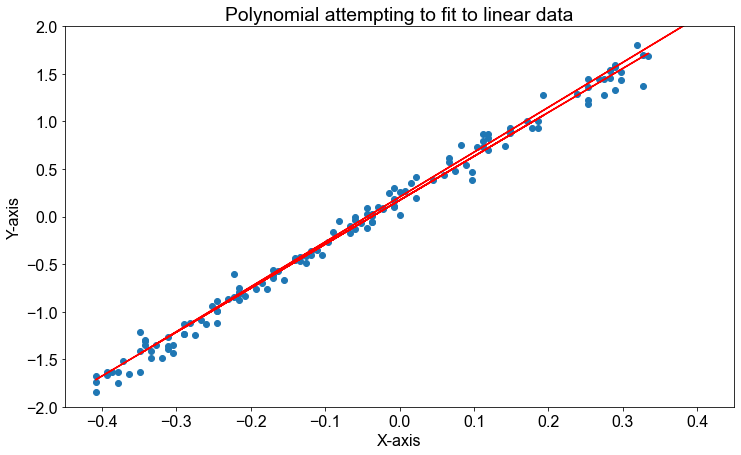

In [13]:
plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 16})

# Plot test points
plt.scatter(test_x, pY_test)

# Plot the attempted polynomial fit / predictions 
plt.plot(test_x, poly_reg_y_predicted, 'r')

plt.title('Polynomial attempting to fit to linear data')
plt.ylabel("Y-axis")
plt.xlabel("X-axis")
fig = plt.gcf()
plt.xlim(-0.45,0.45)
plt.ylim(-2, 2)
fig.set_size_inches(12, 7)
plt.show()

## 7) 
Batch gradient descent uses the whole training set to compete the gradient during every step which is taken. It is thus computationally expensive so is not ideal when the training set is vast. The other issue with BGD is that when there are local minima it can miss the global minimum. The advantage is that it is regular and consistent meaning that it more likely that other methods like SGD to find a theta value which is very close to the global minimum. It is thus best used in situations where there is less training data, the function is convex and a very precise value is desired. Linear regression should be used in situations where the relationship between the x inputs and y inputs is fairly proportionately consistent. That is the distribution of the data point forms a straight line. Polynomial regression should be used in situations in which the relationship between the x inputs and y outputs is not proportionally consistent, ie x is to the power of n where n is greater than 1. This means the data point distribution resembles a curve of some sort. 

## 8) 
Bias is erroneous assumptions or ill fitting approaches. It results in underfitting. Variance it excessive sensitivity to the training data prevent effective generalisation, that is overfitting. Models are always going to be either overfit or underfit to some extent meaning there is no solution to bias and variance. They are in tension and good balance between them should be sought. 
The linear model looks to be fairly well balanced between the two however the application of a polynomial model to a linear data set has clearly resulted in gross overfitting with the line observably doubling back on itself.

## 9)
There are also forms of linear regression such as ridge regression and lasso regression which use a regulariser. A regulariser is a term which is added to the cost function and lowers the variance / prevents over fitting by keeping the weights no larger than they need to be to still minimise the error function.  The strength of the regulariser is determined by the value of the hyper-parameter alpha. Lasso regression has an added feature which is that it puts the weight value at 0 for features with low/no predictive accuracy. This eliminates these features from the calculations which is to lasso regression performs a kind of feature selection. This helps with computational efficiency and combat noisy data making lasso effective to use when the former is a consideration or when noise data is being used. Generally, it is always preferable to use a regression model with a regulariser as these are an effective way of fine tuning the model, striking a balance variance and bias.

## 10)
A decision boundary is a region of space which divides classes. On a plain it may be a line, linear or non-linear. In 3 dimensions it will be a plain, curved or flat and in n dimensions it will be a hyper-plane. There are different ways of determining the spacial position of the decision boundary but they are fulfil the same function which is separating classes.

## 11)
The data above in continuous meaning there are not classes so there is not a decision boundary. In the SVM classification section below however the decision boundary is represent by line which forms from where the different coloured shaded sections meet. 

# Support Vector Machines

Support Vector Machines are a general class of algorithm. They have many applications such as classification, regression and outlier detection. They can be applied to linear and non-linear datasets alike. The reason they are called support vector machines is that when modelling decision boundaries in classification, for example, they only factor in the outliers - that is the outermost data points of the classes which come closest to the others. These are the support vectors. Decision boundaries are then plot equidistant between the support vectors to create the largest possible margin on both sides without any data points within. This means that SVM classifiers are only affected by data points within their margin as only the support vectors and outliers are factored in and change the positioning of the boundary. Sometimes some outliers can be within the margin parallel to the decision boundary. This is known as soft margin classification and it is important as otherwise SVM classification of datasets where points enter other class space would be impossible with a linear boundary line. Non-linear boundary lines however are also possible through adding more features to the data. Finally regression is possible by reversing the technique and trying to find a boundary line whose margin contains the greatest number of points and limit the number of points outside it. Here the inverse also hold and position of the boundary is not affected by what points the margin contains, only those which are outside of it.

For the dataset I used a similar Iris dataset as it was hard to find a dataset which contained 2 attributes which were predictive enough that they alone could be used to sort the data into classes. Mine was found from [kaggle](https://www.kaggle.com/datasets/arshid/iris-flower-dataset). The reason only 2 attributes are being used is that the data will be plot grapically later. Instead of focusing on petal dimensions, however, I decided to focus on the sepal length and width.

 ## Cleaning data

In [14]:
# Load the data
iris_data = pd.read_csv("/Users/isaaclambert/Desktop/iris_dataset/IRIS.csv")

# Transform the classes into numbers
clean = iris_data.replace('Iris-setosa', 0).replace('Iris-versicolor', 1).replace('Iris-virginica', 2)

In [15]:
# Extact classes vector - this will be the y value
classes = clean['species'].to_numpy()
classes.shape

(150,)

In [16]:
# Extract 2 features and put into matrix - this will be the x value
length = clean['sepal_length'].to_numpy()
width = clean['sepal_width'].to_numpy()
lw = np.dstack((length, width)).squeeze()
print(lw.shape)

(150, 2)


In [17]:
# Split the data
lw_train, lw_test, class_train, class_test = split(lw, classes, test_size=0.2, random_state=21, shuffle=True)

In [18]:
# prepares a dictionary for later results comparrison
dic = {'Model':[],'Training accuracy':[], 'Test accuracy':[]}

## Function to train models and provide metrics

In [19]:
def train_and_stats(model, name):
    '''
    trains the model + returns accuracy results in a string 
    + prepares a dictionary for later
    '''    

    # train the model
    model.fit(lw_train, class_train)
    
    # training accuracy
    training_score = round(model.score(lw_train, class_train), 4)*100
    
    # make predictions 
    predicted_classes = model.predict(lw_test)
    
    # test accuracy
    test_score = round(accuracy_score(class_test, predicted_classes), 4) *100
     
    # Update dic ensuring duplication cannot occur if cells are rerun
    values = list(dic.values())
    if name not in values[0]:
        dic['Model'].append(name)
        dic['Training accuracy'].append(training_score)
        dic['Test accuracy'].append(test_score)
         
    return model, training_score, test_score, dic

## Non-scaled LinearSVC

The SVM model is imported. I am using a LinearSVC as this is the simplest kind for classification. I am not scaling the data as this will be done later to show the comparrison.

In [20]:
# Import the model
lin_svc =  LinearSVC()
    
trained_lin_svc, train_result_lin_svc, test_result_lin_svc, dic = train_and_stats(lin_svc, 'Linear SVC without scaling')
    
print("Training accuracy: " + str(train_result_lin_svc) + "%")
print("Test accuracy: " + str(test_result_lin_svc) + "%")


Training accuracy: 78.33%
Test accuracy: 73.33%


/Users/isaaclambert/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


## Scaled Linear SVC

In [21]:
# Import and scale model
scale_lin_svc = Pipeline([
 ("scaler", StandardScaler()),
 ("linear_svc", LinearSVC(C=1, loss="hinge")),])

# call function  
trained_scale, scale_train_result, scale_test_result, dic = train_and_stats(scale_lin_svc, 'Scaled Linear SVC')

print("Scaled training accuracy: " + str(scale_train_result) + "%")
print("Scaled test accuracy: " + str(scale_test_result) + "%")


Scaled training accuracy: 77.5%
Scaled test accuracy: 76.67%


The scaled data improves on the predictive accuracy as shown by the ~3% increase in test accuracy.

## Gaussian RBF kernel based classifier

In [22]:
g_rbf_kernel = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
 ])

trained_g_rbf_kernel, g_rbf_train_result, g_rbf_test_result, dic = train_and_stats(g_rbf_kernel, 'Gaussian RBF kernel')

print("Gaussian RBF kernel classifier training accuracy: " + str(g_rbf_train_result) + "%")
print("Gaussian RBF kernel classifier test accuracy: " + str(g_rbf_test_result) + "%")


Gaussian RBF kernel classifier training accuracy: 35.83%
Gaussian RBF kernel classifier test accuracy: 23.330000000000002%


The accuracy for both test and training sets is extermly low suggesting underfitting is occuring and that the hyper-parameters should be optimised. Gridseach is used to do this below. I could not used scaled model in gridseach so I imported a new non-scaled model.

In [23]:
# import a non-scaled RBF model
no_scale_rbf = SVC(kernel="rbf")
    
# Set the possible values for the hyper-parameterS gamma and C
C = np.array([0.1, 2.5, 5])
gamma = np.array([0.01, 0.05, 0.1])

# Set up grid search and fit it to the data 

grid = GridSearchCV(estimator=no_scale_rbf, param_grid=dict(gamma=gamma, C=C))
grid.fit(X=lw_train, y=class_train);


In [24]:
print(f'Best values for {grid.best_params_}')
print(f'Best training accuracy: {grid.best_score_:.2%}')
print(f'Test accuracy: {grid.score(lw_test, class_test):.2%}')

Best values for {'C': 2.5, 'gamma': 0.05}
Best training accuracy: 83.33%
Test accuracy: 76.67%


Now that the optimal hyper-paramters values have been found a new scaled model will be imported with these values. This has been an iterative approach to model tuning.

In [25]:
opt_g_rbf_kernel = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="rbf", gamma=0.05, C=2.5))
 ])

opt_trained_g_rbf_kernel, opt_g_rbf_train_result, opt_g_rbf_test_result, dic = train_and_stats(opt_g_rbf_kernel, 'Optimized Gaussian RBF kernel')

print("Gaussian RBF kernel (scaled) classifier training accuracy: " + str(opt_g_rbf_train_result) + "%")
print("Gaussian RBF kernel (scaled) classifier test accuracy: " + str(opt_g_rbf_test_result) + "%")


Gaussian RBF kernel (scaled) classifier training accuracy: 83.33%
Gaussian RBF kernel (scaled) classifier test accuracy: 76.67%


In [26]:
display(pd.DataFrame.from_dict(dic))

,Model,Training accuracy,Test accuracy
0,Linear SVC without scaling,78.33,73.33
1,Scaled Linear SVC,77.50,76.67
2,Gaussian RBF kernel,35.83,23.33
3,Optimized Gaussian RBF kernel,83.33,76.67


* I cannot comment on the models' robustness to noise since the data I used barely contained any noise. This is because it only contained 2 features, this was necessary so the models could be plot graphically. Anyhow SVM classifers are robust to noise generally as they are only affected by data points near the boundry line.

* Scaling the data most likely improved the width and position of the boundry lines marginally (this is overvable on the plots). The improvement was a ~3% increase in test accuracy.

* The Gaussian RBF kernel model was initally hugely underfitted and was producing extremely low accuracy in training and testing. As such, gridseach was used to optimise the hyper-parameters. Although gamma was actually decreased by a factor of 100, C was increased by a factor of 2500 suggesting that the regulization was far to strong and underfitting was the issue. 

* With these new parameter values for the Gaussian RBF kernel model, training and test accuracy improved dramatically. The training data was higher than on any of the previous models. The test data however retured to the plateau of 76.67%.

* This suggests to me that ~76.67% accuracy is the limit of the particular slice of test data generated by the test_train_split function. Properly fitted models are unlikely to impove these figure further as they are limited by the distribution of the data.

## Visualizations
The tabulated results in rows 0, 1 and 3 can be compared against their visualizations below.

[This reference](https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html) to help code the boundry lines / classes visualization.

In [27]:
h = .02  # step size in the mesh
C = 1.0  # SVM regularization parameter

# create a mesh to plot in
x_min, x_max = lw[:, 0].min() - 1, lw[:, 0].max() + 1
y_min, y_max = lw[:, 1].min() - 1, lw[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

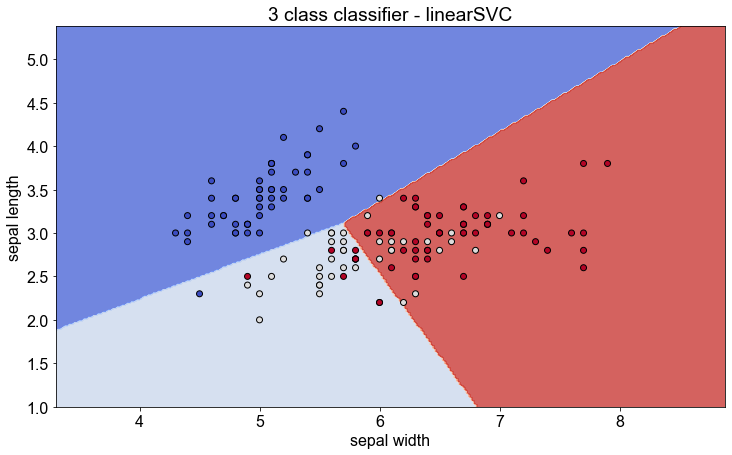

In [28]:
Zy = trained_lin_svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Zy.reshape(xx.shape)

plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 16})

# Put the result into a color plot
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# plot the data points
plt.scatter(lw[:, 0], lw[:, 1],c=classes, edgecolors='k', cmap=plt.cm.coolwarm )

plt.title('3 class classifier - linearSVC')
plt.ylabel("sepal length")
plt.xlabel("sepal width")
fig = plt.gcf()
fig.set_size_inches(12, 7)
plt.show()

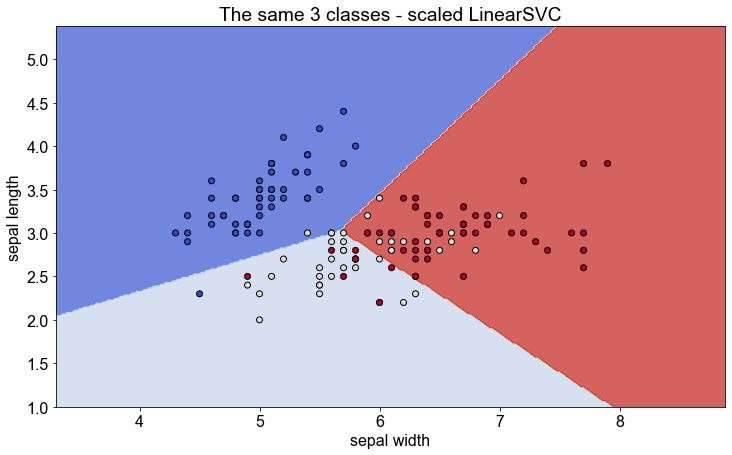

In [29]:
Sy = trained_scale.predict(np.c_[xx.ravel(), yy.ravel()])
S = Sy.reshape(xx.shape)

plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 16})

# Put the result into a color plot
plt.contourf(xx, yy, S, cmap=plt.cm.coolwarm, alpha=0.8)

# plot the data points
plt.scatter(lw[:, 0], lw[:, 1],c=classes, edgecolors='k', cmap=plt.cm.coolwarm )

plt.title('The same 3 classes - scaled LinearSVC')
plt.ylabel("sepal length")
plt.xlabel("sepal width")
fig = plt.gcf()
fig.set_size_inches(12, 7)
plt.show()

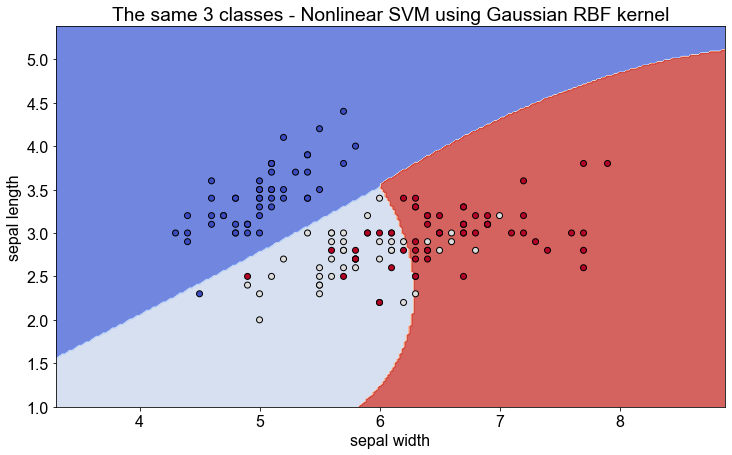

In [30]:
rbfy = opt_trained_g_rbf_kernel.predict(np.c_[xx.ravel(), yy.ravel()])
rbf = rbfy.reshape(xx.shape)

plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 16})

# Put the result into a color plot
plt.contourf(xx, yy, rbf, cmap=plt.cm.coolwarm, alpha=0.8)

# plot the data points
plt.scatter(lw[:, 0], lw[:, 1],c=classes, edgecolors='k', cmap=plt.cm.coolwarm )

plt.title('The same 3 classes - Nonlinear SVM using Gaussian RBF kernel')
plt.ylabel("sepal length")
plt.xlabel("sepal width")
fig = plt.gcf()
fig.set_size_inches(12, 7)
plt.show()

## SVM polynomial regression 
The data set was intended for classifciation, therefore by applying a regression model to it, we are unlikely to yield goood results. Either a low accuracy or overfitting is likely and possibly both. 

Since regression models don't take classes as the input the Iris dataset will undergo new preprocessing. 

In [31]:
# Cleaning the data

width = clean['sepal_width'].to_numpy()
length = clean['sepal_length'].to_numpy()

ex_d_width = np.expand_dims(width, axis=1)

width_xd_scale = scale(ex_d_width)
len_scale = scale(length)

print(width_xd_scale.shape)
print(len_scale.shape)

(150, 1)
(150,)


In [32]:
# Splitting the data
x_reg_SVM_train, x_reg_SVM__test, y_reg_SVM_train, y_reg_SVM_test = split(width_xd_scale, len_scale, test_size=0.2, random_state=21, shuffle=True)


In [33]:
# Import model
regres_svm_poly = SVR(kernel="poly", degree=2, C=0.1)

# Train model
regres_svm_poly.fit(x_reg_SVM_train, y_reg_SVM_train);


In [34]:
# Make predictions on test set
pred_reg_SMV_y = regres_svm_poly.predict(x_reg_SVM__test)

# Calc and print RMSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_reg_SVM_test, pred_reg_SMV_y)))

Root Mean Squared Error: 0.8956056768148741


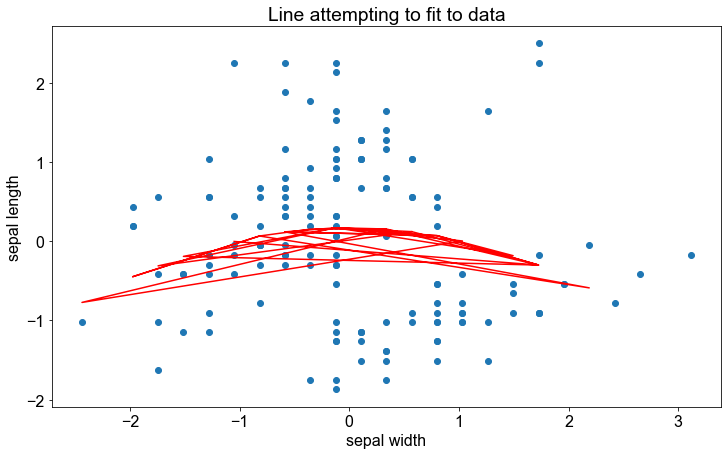

In [35]:
# Plot Results 

plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 16})

# Plot test points

#plt.scatter(x_reg_SVM__test, y_reg_SVM_test )
plt.scatter(width_xd_scale, len_scale)

# Plot line of best fit / predictions 
plt.plot(x_reg_SVM__test, pred_reg_SMV_y, 'r')

plt.title('Line attempting to fit to data')
plt.ylabel("sepal length")
plt.xlabel("sepal width")
fig = plt.gcf()
fig.set_size_inches(12, 7)
#plt.xlim(-0.45,0.45)
#plt.ylim(-2, 2)
plt.show()

As guessed the RSME is high relative to the scale of the data and model is observably overfitted with line doubling back on itself repeatedly. This is even the case with a polynomial degree 2, the lowest, and a low c value, meaning high regulization. This is the case due to the fact that the dataset is relatively small and the data is intented for classification, not regression. This means the points are in seperate clusters and hard to connect with a single line. 